# Storks data analysis

by **Bradley Aldous**

## Contents

 1. [Preparing the dataset](#first)
      
 2. [Analysis 1: Explaining the variability of the number of births](#second)
      1. [Implementing two regression models for the number of births](#2a)
      1. [Using the bootstrap technique to estimate the distribution of the difference in the $R^2$ parameter](#2b)
      1. [Conclusions](#2c)
      
 3. [Analysis 2: Predicting the number of storks](#third)
      1. [Implementing two regression models for the number of storks](#3a)
      1. [Using the bootstrap technique to estimate the difference in the root mean squared error (RMSE)](#3b)
      1. [Conclusions](#3c)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt

## Part 1 - Preparing the dataset <a class="anchor" id="first"></a>

The storks dataset is first read and stored in a pandas data frame called 'storks'.

In [2]:
storks = pd.read_csv('storks.csv')
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


Some of the variables in this data have had their units scaled down, for the following analysis I've brought each variable back to its normal count. This allows easier comprehension of quantities derived in the analysis, which can then be scaled back down at the end if needed.

In [3]:
storks['Humans'] = storks['Humans'] * (10**6)
storks['BirthRate'] = storks['BirthRate'] * (10**3)
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3200000.0,83000,55.68
1,Austria,83860,300,7600000.0,87000,38.34
2,Belgium,30520,1,9900000.0,118000,65.93
3,Bulgaria,111000,5000,9000000.0,117000,57.99
4,Denmark,43100,9,5100000.0,59000,81.46
5,France,544000,140,56000000.0,774000,58.47
6,Germany,357000,3300,78000000.0,901000,59.81
7,Greece,132000,2500,10000000.0,106000,47.31
8,Holland,41900,4,15000000.0,188000,70.96
9,Hungary,93000,5000,11000000.0,124000,75.86


## Part 2 - Analysis 1: Explaining the variability of the number of births <a class="anchor" id="second"></a>

In this section, we implement two regression models to explain the variability in the number of births. The two models both use a single predictor, the first model takes the number of stork pairs ('Storks') as a predictor, whilst the second model uses the human population size ('Humans') as its predictor. We then perform a bootstrap to resample the data and fit the models 500 times to allow us to plot a distribution of the difference in $R^2$ between the two models.

In [4]:
#fig, (a1,a2) = plt.subplots(2, 1, figsize=(10,20))
#storks.hist('Storks', bins=20, ax=a1)
#storks.hist('Humans', bins=20, ax=a2)

### A. Implementing two regression models for the number of births <a class="anchor" id="2a"></a>

In the regression below, our y-value is taken as 'BirthRate' and our x-value (predictor) is taken as 'Storks'. A regression is then implemented, giving us the values for the Storks regression coefficient, the intercept, and the coefficient of determination ($R^2$).

In [5]:
y = storks.BirthRate
x1 = np.array(storks.Storks).reshape((-1,1))

reg1 = LinearRegression().fit(x1, y)
print('The R2 coefficient of determination is %4.3f' % reg1.score(x1, y))
print('The intercept is %4.1f' % reg1.intercept_)
print('Estimated regression coefficient for Storks is %4.2f' % reg1.coef_, 
      'change of max heart rate (beats / min) per year')

The R2 coefficient of determination is 0.385
The intercept is 225028.7
Estimated regression coefficient for Storks is 28.79 change of max heart rate (beats / min) per year


The above value for $R^2$ seems to indicate that there is a correlation between 'Storks' and 'BirthRate', though not a particularly strong one (at 38.5% accuracy). We can produce a scatter plot to help visualise the relationship.

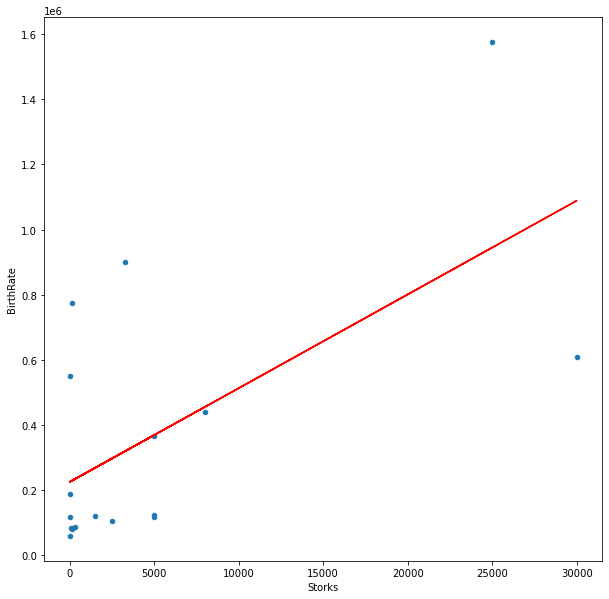

In [6]:
storks.plot(kind='scatter',  x='Storks', y='BirthRate', figsize=(10,10))
plt.plot(x1, reg1.intercept_ + reg1.coef_ * x1, c='r')

Our second regression model takes the same y-value ('BirthRate'), but takes 'Humans' as its x-value (predictor). A regression is then implemented, giving us the values for the Storks regression coefficient, the intercept, and the coefficient of determination.

In [7]:
x2 = np.array(storks.Humans).reshape((-1,1))

reg2 = LinearRegression().fit(x2, y)
print('The R2 coefficient of determination is %4.3f' % reg2.score(x2, y))
print('The intercept is %4.1f' % reg2.intercept_)
print('Estimated regression coefficient for Humans is %4.2f' % reg2.coef_, 
      'change of max heart rate (beats / min) per year')

The R2 coefficient of determination is 0.725
The intercept is -8445.1
Estimated regression coefficient for Humans is 0.01 change of max heart rate (beats / min) per year


Here we can see that the coefficient of determination takes a value closer to 1, indicating that this model predicts the number of births to a higher degree of accuracy compared to the first (72.5% compared to 38.5%). We can again produce a scatter plot to help visualise the relationsship.

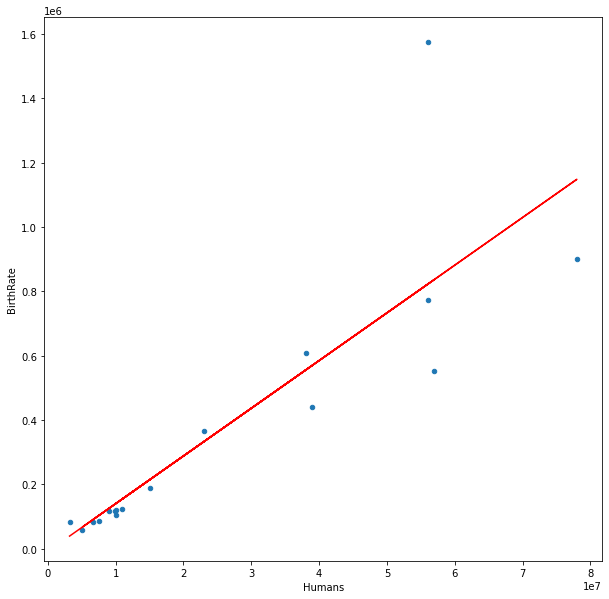

In [8]:
storks.plot(kind='scatter',  x='Humans', y='BirthRate', figsize=(10,10))
plt.plot(x2, reg2.intercept_ + reg2.coef_ * x2, c='r')

Here, we can see that the regression line fits the data far better than in the first model, leading me to believe that the second model is superior to the first in explaining the variability in the number of births.

### B. Using the bootstrap technique to estimate the distribution of the difference in the $R^2$ parameter <a class="anchor" id="2b"></a>

Here, we implement the bootstrap technique to resample our data and fit the regression model 500 times.

In [9]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

In [10]:
def doRegressions1(df) :
    y = df.BirthRate
    x1 = np.array(df.Storks).reshape((-1,1))
    x2 = np.array(df.Humans).reshape((-1,1))
    reg1 = LinearRegression().fit(x1, y)
    reg2 = LinearRegression().fit(x2, y)
    return [reg1.intercept_, reg1.coef_[0], reg1.score(x1, y), reg2.intercept_, reg2.coef_[0], reg2.score(x2, y), reg1.score(x1, y) - reg2.score(x2, y)]

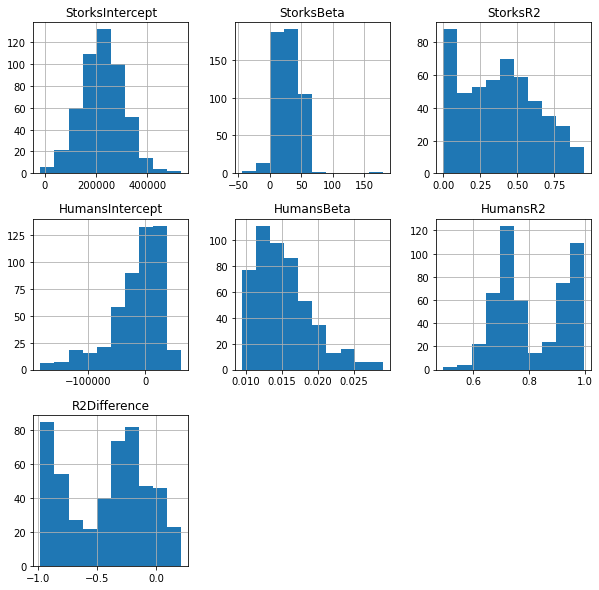

In [11]:
bstrap1 = bootstrapC(storks, ['StorksIntercept', 'StorksBeta', 'StorksR2', 'HumansIntercept', 'HumansBeta', 'HumansR2', 'R2Difference'], 500, doRegressions1) 
_ = bstrap1.hist(figsize=(10,10))

In [12]:
bstrap1

,StorksIntercept,StorksBeta,StorksR2,HumansIntercept,HumansBeta,HumansR2,R2Difference
0,266643.325242,11.166713,0.112767,21794.681678,0.011771,0.951825,-0.839059
1,358023.725139,17.753234,0.237630,19583.506253,0.013674,0.670513,-0.432883
2,124194.899107,37.139228,0.585912,-76774.802366,0.021937,0.786483,-0.200570
3,154422.743513,53.550546,0.691394,-42861.223415,0.017708,0.712836,-0.021442
4,80487.164997,55.772619,0.812085,-108459.189799,0.023592,0.838345,-0.026260
...,...,...,...,...,...,...,...
495,88691.092202,53.061270,0.805386,-42602.980455,0.017947,0.710634,0.094752
496,161841.171882,31.538358,0.552128,-104371.688613,0.023546,0.858250,-0.306122
497,216089.654595,26.012383,0.432985,-35558.481285,0.017955,0.695313,-0.262328
498,226273.806180,41.954753,0.108922,9470.952015,0.011518,0.974745,-0.865823


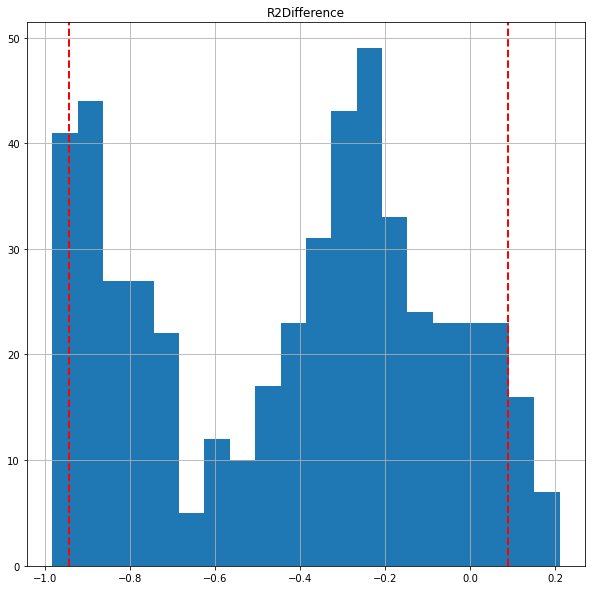

In [13]:
bstrap1.hist('R2Difference', bins=20, figsize=(10,10))
plt.axvline(bstrap1.R2Difference.quantile(0.05), color='r', linestyle='dashed', linewidth=2)
plt.axvline(bstrap1.R2Difference.quantile(0.95), color='r', linestyle='dashed', linewidth=2)

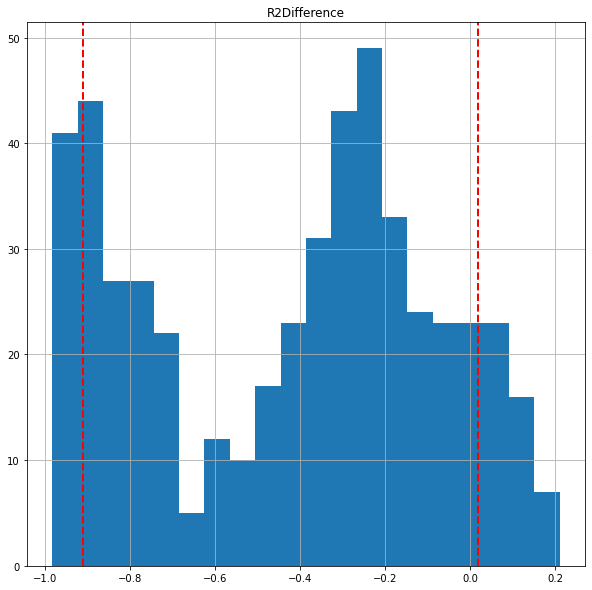

In [14]:
bstrap1.hist('R2Difference', bins=20, figsize=(10,10))
plt.axvline(bstrap1.R2Difference.quantile(0.1), color='r', linestyle='dashed', linewidth=2)
plt.axvline(bstrap1.R2Difference.quantile(0.9), color='r', linestyle='dashed', linewidth=2)

In [15]:
intercept_storks, beta_storks, r2_storks, intercept_humans, beta_humans, r2_humans, r2difference = doRegressions1(storks)

print("The R2 difference is %3.2f, with 90%% CI from %3.2f to %3.2f" % 
      (r2difference, bstrap1.R2Difference.quantile(0.05), bstrap1.R2Difference.quantile(0.95)))
print("The R2 difference is %3.2f, with 80%% CI from %3.2f to %3.2f" % 
      (r2difference, bstrap1.R2Difference.quantile(0.1), bstrap1.R2Difference.quantile(0.9)))

The R2 difference is -0.34, with 90% CI from -0.94 to 0.09
The R2 difference is -0.34, with 80% CI from -0.91 to 0.02


### C. Conclusions <a class="anchor" id="2c"></a>

From the above it can be seen that the first confidence interval (90%) has the zero line inside it, meaning we can't be completely confident that that one model explains the difference better than the other. Though it appears that the second model (with 'Humans' as predictor) is a more accurate model in most instances.

However, if we alter the confidence interval (to 80%), we can see that this confidence interval doesn't cross the zero line, and so we can be confident that the second model explains more of the variability in the number of births at this confidence.

## Part 3 - Analysis 2: Predicting the number of storks <a class="anchor" id="third"></a>

In this section, we are looking at two different regression models and analysing their performance in predicting the number of stork pairs. In our first model, we are using land area as the predictor, and in the second; population density and area of suitable land. These last two variables aren't included in the dataset, however we can derive them from some of the variables present. Population density can be found by simply dividing the population ('Humans'), by 'Area'. Suitable land area can be found by multiplying 'Area' by 'SuitableAreaPercent' (once scaled down by two orders of magnitude, as this variable is stored in the data as a percentage, not a decimal value). We then perform a bootstrap to resample the data and fit the models 500 times to allow us to plot a distribution of the difference in RMSEs between the two models.

In [16]:
storks['PopulationDensity'] = storks['Humans'] / storks['Area']
storks['SuitableArea'] = (storks['SuitableAreaPercent'] / 100) * storks['Area']
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopulationDensity,SuitableArea
0,Albania,28750,100,3200000.0,83000,55.68,111.304348,16008.000
1,Austria,83860,300,7600000.0,87000,38.34,90.627236,32151.924
2,Belgium,30520,1,9900000.0,118000,65.93,324.377457,20121.836
3,Bulgaria,111000,5000,9000000.0,117000,57.99,81.081081,64368.900
4,Denmark,43100,9,5100000.0,59000,81.46,118.329466,35109.260
5,France,544000,140,56000000.0,774000,58.47,102.941176,318076.800
6,Germany,357000,3300,78000000.0,901000,59.81,218.487395,213521.700
7,Greece,132000,2500,10000000.0,106000,47.31,75.757576,62449.200
8,Holland,41900,4,15000000.0,188000,70.96,357.995227,29732.240
9,Hungary,93000,5000,11000000.0,124000,75.86,118.279570,70549.800


### A. Implementing two regression models for the number of storks <a class="anchor" id="3a"></a>

In the regression below, our y-value is taken as 'Storks' and our x-value (predictor) is taken as 'Area'. A regression is then implemented, giving us the values for the Area regression coefficient, the intercept, and the RMSE.

In [17]:
y = storks.Storks
x3 = np.array(storks.Area).reshape((-1,1))

reg3 = LinearRegression().fit(x3, y)
print('The R2 coefficient of determination is %4.3f' % reg3.score(x3, y))
print('The intercept is %4.1f' % reg3.intercept_)
print('Estimated regression coefficient for Area is %4.2f' % reg3.coef_, 
      'change of max heart rate (beats / min) per year')

The R2 coefficient of determination is 0.336
The intercept is -60.7
Estimated regression coefficient for Area is 0.02 change of max heart rate (beats / min) per year


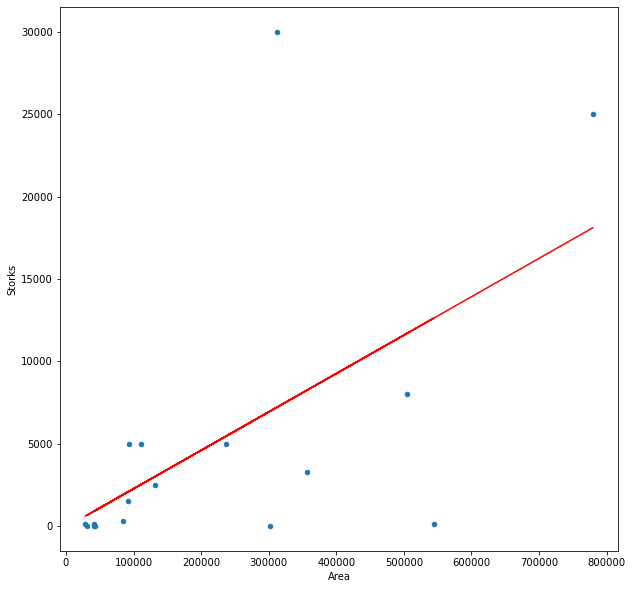

In [18]:
storks.plot(kind='scatter',  x='Area', y='Storks', figsize=(10,10))
plt.plot(x3, reg3.intercept_ + reg3.coef_ * x3, c='r')

Our second regression model takes the same y-value ('Storks'), but takes 'PopulationDensity' and 'SuitableArea' as its predictors. A regression is then implemented, giving us the values for the regression coefficients, the intercept, and the RMSE.

In [19]:
y = storks.Storks
x4 = np.array(storks.PopulationDensity).reshape((-1,1))
x5 = np.array(storks.SuitableArea).reshape((-1,1))
X = np.column_stack((x4, x5))


reg4 = LinearRegression().fit(X, y)
y_hat = reg4.predict(X)
print('The R2 coefficient of determination is %4.3f' % reg4.score(X, y))
print('The intercept is %4.1f' % reg4.intercept_)
print('Estimated regression coefficient for Population Density is %4.2f' % reg4.coef_[0], 
      'change of max heart rate (beats / min) per year')
print('Estimated regression coefficient for Suitable Area is %4.2f' % reg4.coef_[1], 
      'change of max heart rate (beats / min) per year')

The R2 coefficient of determination is 0.393
The intercept is 1881.4
Estimated regression coefficient for Population Density is -12.13 change of max heart rate (beats / min) per year
Estimated regression coefficient for Suitable Area is 0.04 change of max heart rate (beats / min) per year


Text(0, 0.5, 'Actual Value')

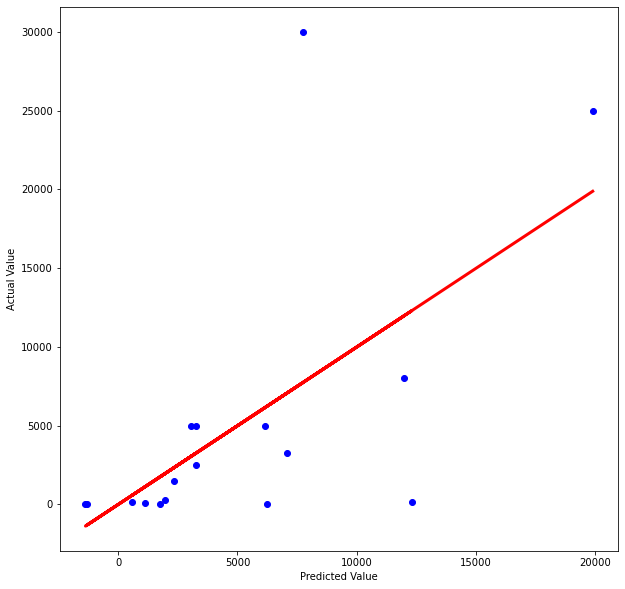

In [20]:
fig, a = plt.subplots(1,1,figsize=(10,10))
a.scatter(y_hat, y,  color='blue')
a.plot(y_hat, y_hat, color='r', linewidth=3)

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### B. Using the bootstrap technique to estimate the difference in the root mean squared error (RMSE) <a class="anchor" id="3b"></a>

Here, we implement the bootstrap technique to resample our data and fit the regression model 500 times. We use the same bootstrap function as above, however our regression implementation is slightly different, as outlined in part 3A above.

In [21]:
def doRegressions2(df) :
    y = df.Storks
    x1 = np.array(df.Area).reshape((-1,1))
    x2 = np.array(df.PopulationDensity).reshape((-1,1))
    x3 = np.array(df.SuitableArea).reshape((-1,1))
    X = np.column_stack((x2, x3))
    reg1 = LinearRegression().fit(x1, y)
    reg2 = LinearRegression().fit(X, y)
    y1_pred = reg1.predict(x1)
    y2_pred = reg2.predict(X)
    RMSE1 = np.sqrt(metrics.mean_squared_error(y, y1_pred))
    RMSE2 = np.sqrt(metrics.mean_squared_error(y, y2_pred))
    PopulationDensityBeta, SuitableAreaBeta = reg2.coef_
    return [reg1.intercept_, reg1.coef_[0], RMSE1,
            reg2.intercept_, PopulationDensityBeta, SuitableAreaBeta, RMSE2, RMSE1 - RMSE2]

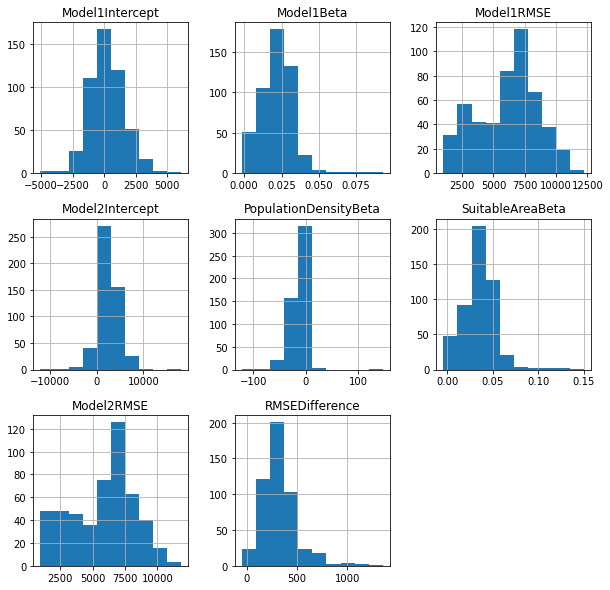

In [22]:
bstrap2 = bootstrapC(storks, ['Model1Intercept', 'Model1Beta', 'Model1RMSE', 'Model2Intercept', 'PopulationDensityBeta', 'SuitableAreaBeta', 'Model2RMSE', 'RMSEDifference'], 500, doRegressions2) 
_ = bstrap2.hist(figsize=(10,10))

In [23]:
bstrap2

,Model1Intercept,Model1Beta,Model1RMSE,Model2Intercept,PopulationDensityBeta,SuitableAreaBeta,Model2RMSE,RMSEDifference
0,569.455889,0.038361,10891.153650,2787.409075,-17.880353,0.067156,10370.409534,520.744116
1,1384.349648,0.016879,6470.852950,2853.650808,-11.595997,0.029560,6297.918482,172.934467
2,-104.231093,0.022574,6143.798497,2495.228946,-20.206038,0.039614,5886.775240,257.023257
3,57.525386,0.026546,6215.346471,2450.026671,-15.629829,0.041183,5879.675174,335.671297
4,-1518.364194,0.030732,6253.431124,2135.491246,-27.626248,0.046330,5923.664775,329.766349
...,...,...,...,...,...,...,...,...
495,-380.015388,0.032789,7802.459455,2321.847061,-11.992183,0.047912,7553.989419,248.470036
496,456.087632,0.008252,2462.790135,1998.171963,-10.000205,0.012950,2299.007974,163.782160
497,314.826212,0.028878,8558.889750,3052.874970,-19.179638,0.046367,8202.490887,356.398863
498,-342.825498,0.020370,7503.695929,1373.347787,-9.534074,0.032133,7231.496970,272.198959


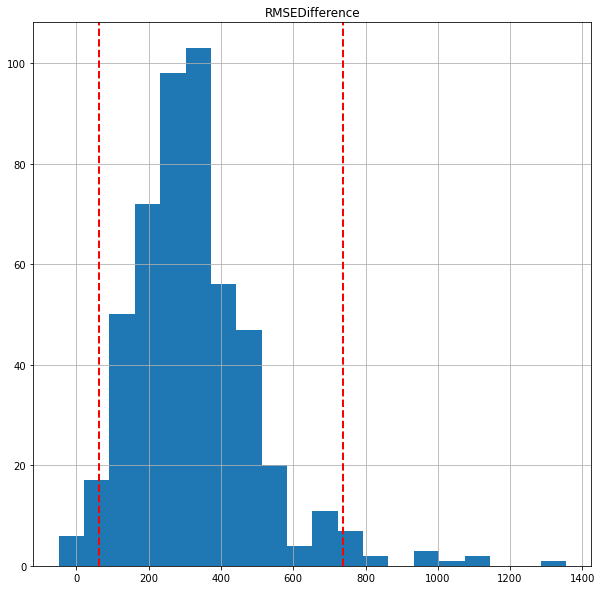

In [24]:
bstrap2.hist('RMSEDifference', bins=20, figsize=(10,10))
plt.axvline(bstrap2.RMSEDifference.quantile(0.025), color='r', linestyle='dashed', linewidth=2)
plt.axvline(bstrap2.RMSEDifference.quantile(0.975), color='r', linestyle='dashed', linewidth=2)

In [25]:
intercept_1, beta_, rmse_1, intercept_2, beta_1, beta_2, rmse_1, rmsedifference = doRegressions2(storks)

print("The RMSE difference is %3.2f, with 90%% CI from %3.2f to %3.2f" % 
      (rmsedifference, bstrap2.RMSEDifference.quantile(0.025), bstrap2.RMSEDifference.quantile(0.975)))

The RMSE difference is 307.74, with 90% CI from 61.72 to 738.04


### C. Conclusions <a class="anchor" id="3c"></a>

Here, we can clearly see that to a higher confidence than in our first analysis (95% confidence interval) we can be confident that the first model (land area predictor) predicts the number of storks better than the second as the zero line isn't within the confidence interval.